# **Project Name**    -  ***Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce***



##### **Project Type**    - Unsupervised clustering
##### **Contribution**    - Individual
##### **Team Member 1 -** - Adarsha Kumar Karna


# **Project Summary -**



**Project Summary**

The "Shopper Spectrum" project was an end-to-end data science initiative designed to extract actionable business intelligence from a large transactional dataset of an online retail business. The primary objective was twofold: to group customers into distinct segments for targeted marketing and to build a personalized product recommendation system to enhance user experience and drive sales.

The project began with a rigorous data preprocessing phase, where the raw data was cleaned to ensure quality and consistency. This involved handling missing CustomerID values, removing cancelled transactions and returns, and filtering out erroneous data points such as negative quantities or zero-priced items. Subsequently, an in-depth Exploratory Data Analysis (EDA) was performed to uncover key patterns. This analysis revealed critical insights, including the overwhelming dominance of the UK market, a significant spike in sales during the holiday season (peaking in November), and a purchasing pattern where the vast majority of transactions were for lower-value items.

For customer segmentation, the project leveraged the powerful RFM (Recency, Frequency, Monetary) analysis framework. RFM scores were calculated for each customer, and the K-Means clustering algorithm was applied to group them. The optimal number of clusters was determined using the Elbow Method and Silhouette Scores, resulting in four distinct, interpretable customer segments: High-Value, Regular, Occasional, and At-Risk. This segmentation provides the business with a clear roadmap for designing tailored marketing campaigns, from rewarding loyal customers to re-engaging those at risk of churn.

To address the second objective, an item-based collaborative filtering recommendation system was developed. By creating a user-item matrix of customers and the products they purchased, the cosine similarity between all product pairs was calculated. This produced a similarity matrix that forms the core of the recommendation engine, capable of suggesting the top 5 most similar products to any given item, thereby encouraging cross-selling and improving product discovery.

Finally, the project culminated in the development of a fully interactive, multi-page web application using Streamlit. This application serves as a user-friendly interface for the underlying models, allowing business stakeholders to perform two key functions: 1) predict the segment of any customer by entering their RFM values, and 2) get real-time product recommendations by selecting a product from a list. This deployment successfully bridges the gap between complex data models and practical business use, delivering a tangible and valuable tool.


# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/adrs01

# **Problem Statement**



**Problem Statement**

Online retail businesses collect vast amounts of transactional data but often struggle to translate it into actionable strategies. The core challenge is to effectively utilize this data to identify distinct customer archetypes for personalized marketing and to implement a recommendation engine that can increase user engagement and sales, moving from raw data to data-driven decision-making.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

#load datasets
df=pd.read_csv('/content/drive/MyDrive/online_retail.csv')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
display("datasets", df.head())

'datasets'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("no of rows:", df.shape[0])
print("no of columns:", df.shape[1])

no of rows: 541909
no of columns: 8


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

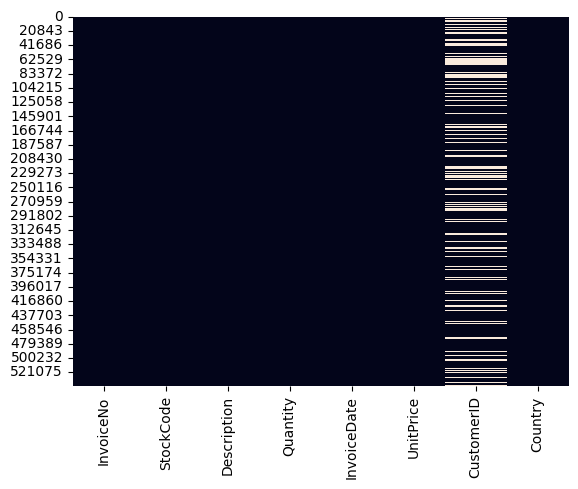

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

After analysing we found that there are some missing values in the datasets, especially in the custumer ID section


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  
0       2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1       2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2       2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3       2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4       2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                     ...        ...         ...             ...  
541904  2023-12-09 12:50:00       0.85     12680.0          France  
541905  2023-12-09 12:50:00       2.10     12680.0          France  
541906  2023-12-09 12:50:00       4.15     12680.0          France  
541907  2023-12-09 12:50:00       4.15     12680.0          France  
541908  2023-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]>

### Variables Description

Answer Here

The datsets are not clean, alot of missing values are there which need to be cleaned in the data wrangling/cleaning process

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
import pandas as pd

#  Data Preprocessing

# 1. Remove rows with missing CustomerID
# This step drops all rows where the 'CustomerID' column has a null (NaN) value.
# The `inplace=True` argument modifies the DataFrame directly.
df.dropna(subset=['CustomerID'], inplace=True)


# 2. Exclude cancelled invoices (InvoiceNo starting with 'C')
# We first ensure the 'InvoiceNo' column is of string type to use string methods.
# Then, we filter the DataFrame to exclude all rows where 'InvoiceNo' starts with 'C'.
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df = df[~df['InvoiceNo'].str.startswith('C')]


# 3. Remove negative or zero quantities and prices
# This filters the DataFrame to keep only the rows where both 'Quantity' and
# 'UnitPrice' are greater than zero.
# Note: The column for price is often named 'UnitPrice'. If your column has a different name (e.g., 'Price'),
# please adjust the code accordingly.
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


# Optional: Display the first few rows and the new shape of the DataFrame to verify the changes.
print("Data after preprocessing:")
print(df.head())
print("\nShape of the DataFrame after cleaning:", df.shape)

Data after preprocessing:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  

Shape of the DataFrame after cleaning: (397884, 8)


### What all manipulations have you done and insights you found?

Answer Here.

In the data wrangling process I did some steps to make my datasets neat and clean. The steps that were included in my manipulations are given below:

->Remove rows with missing CustomerID


->Exclude cancelled invoices (InvoiceNo starting with 'C')


->Remove negative or zero quantities and prices


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#1. **Analyze Transaction Volume by Country**

**This code calculates the number of transactions for each country and visualizes the top 10 countries with the highest transaction volumes**

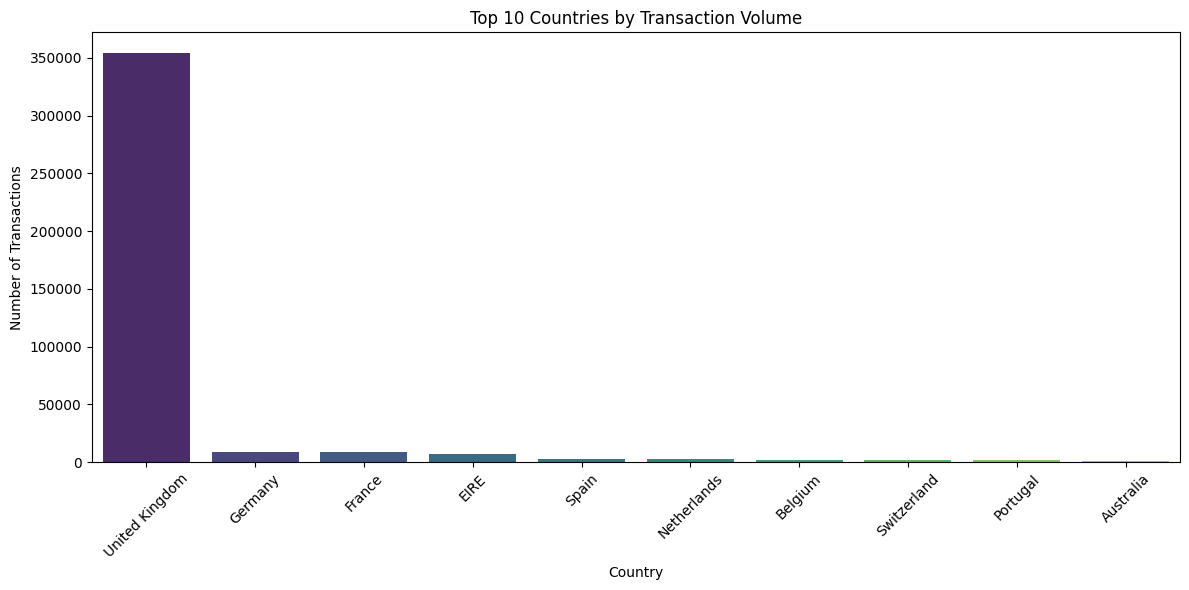

Top 10 Countries by Transaction Volume:
Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Analyze Transaction Volume by Country ---

# Calculate the number of transactions per country
country_counts = df['Country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Plotting the transaction volume for the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top 10 countries and their transaction counts
print("Top 10 Countries by Transaction Volume:")
print(top_10_countries)

##### 1. Why did you pick the specific chart?

I specifically chose the bar chart because it quickly shows how number of transactions varies by country, sorting it from top to down

##### 2. What is/are the insight(s) found from the chart?

The UK has the highest number of transcations by volume as compared to other countries

#2. **Identify Top-Selling Products**
**This script identifies the most popular products based on the total quantity sold and plots the top 10**

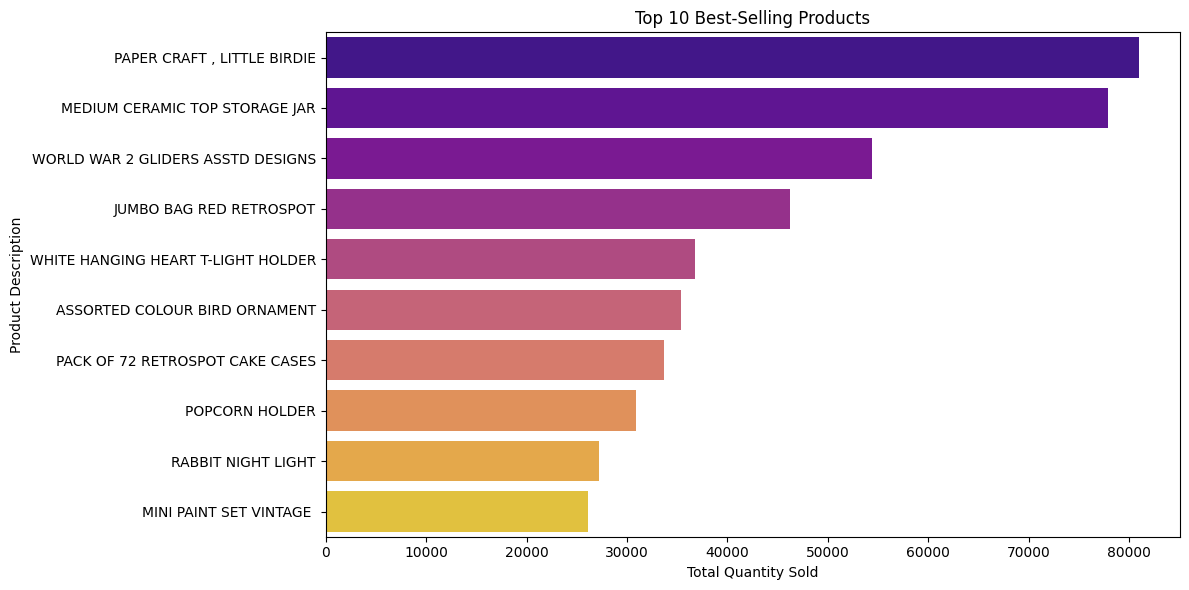

Top 10 Best-Selling Products:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- 2. Identify Top-Selling Products ---

# Group by product description and sum the quantities
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Get the top 10 best-selling products
top_10_products = top_products.head(10)

# Plotting the top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='plasma')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

# Print the top 10 products and their quantities sold
print("Top 10 Best-Selling Products:")
print(top_10_products)

##### 1. Why did you pick the specific chart?
##### 2. What is/are the insight(s) found from the chart?

Answer Here.

I chose the horizontal bar chart because it clearly shows Total Quantity Sold  by Product Description making it easy to compare and read.

The paper craft tops the top selling products in total quantity

#3. **Visualize Purchase Trends Over Time**
**This code converts the InvoiceDate to a datetime format, calculates the daily total sales, and plots the purchase trend**

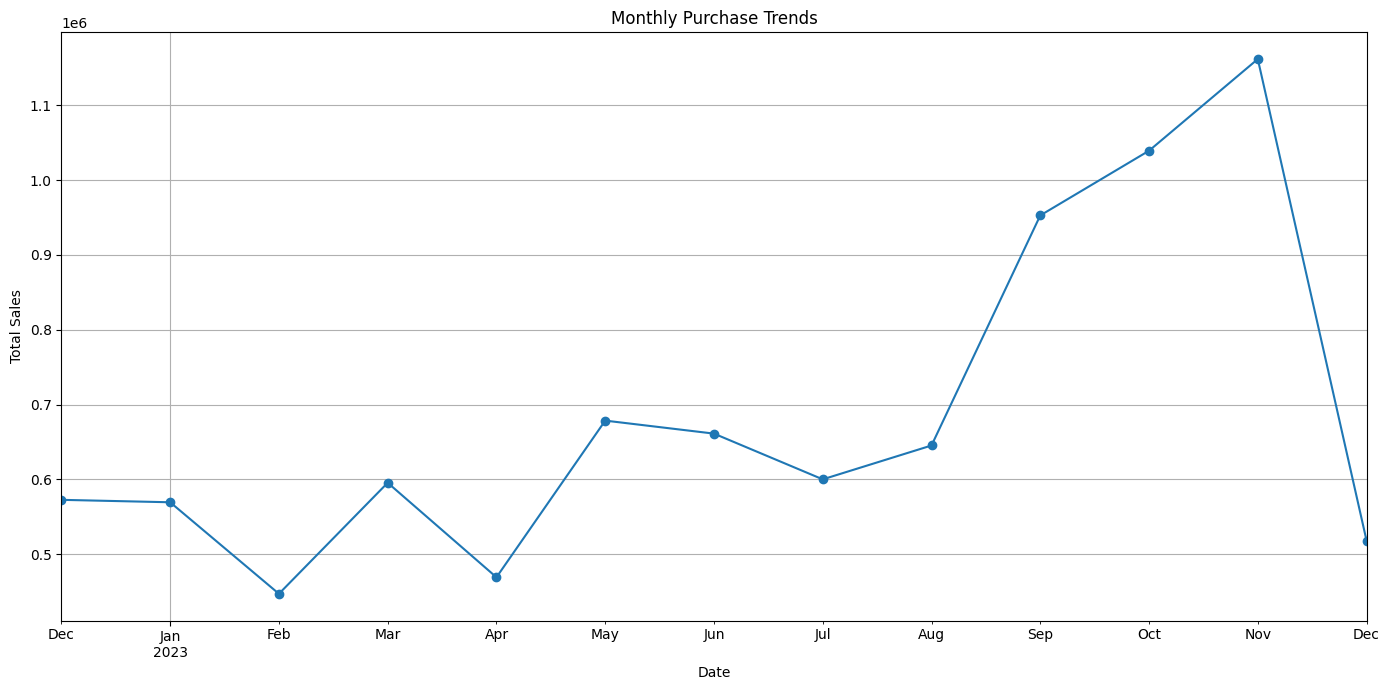

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# --- 3. Visualize Purchase Trends Over Time ---

# Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate the total price for each transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Resample data by month to see the trend
monthly_sales = df.set_index('InvoiceDate')['TotalPrice'].resample('M').sum()

# Plotting the purchase trends over time
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Purchase Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()



#1. Why did you pick this chart?

A line chart is the best choice because it clearly shows how sales data changes over time. It makes it easy to spot trends, seasonal patterns, and significant peaks or dips at a glance.

#2. What are the insights from the chart?

Holiday Sales Peak: There is a major spike in sales near the end of the year (peaking in November), which points to a strong holiday shopping season.

Critical Business Period: This end-of-year peak is the most important time for revenue, highlighting the need for focused marketing and inventory planning during this period.

Post-Holiday Dip: Sales tend to drop after the holiday season, suggesting an opportunity for post-holiday sales or promotions.

#4. **Inspect Monetary Distribution**
**This part visualizes how the total purchase amount (TotalPrice) is distributed per transaction and per customer.**

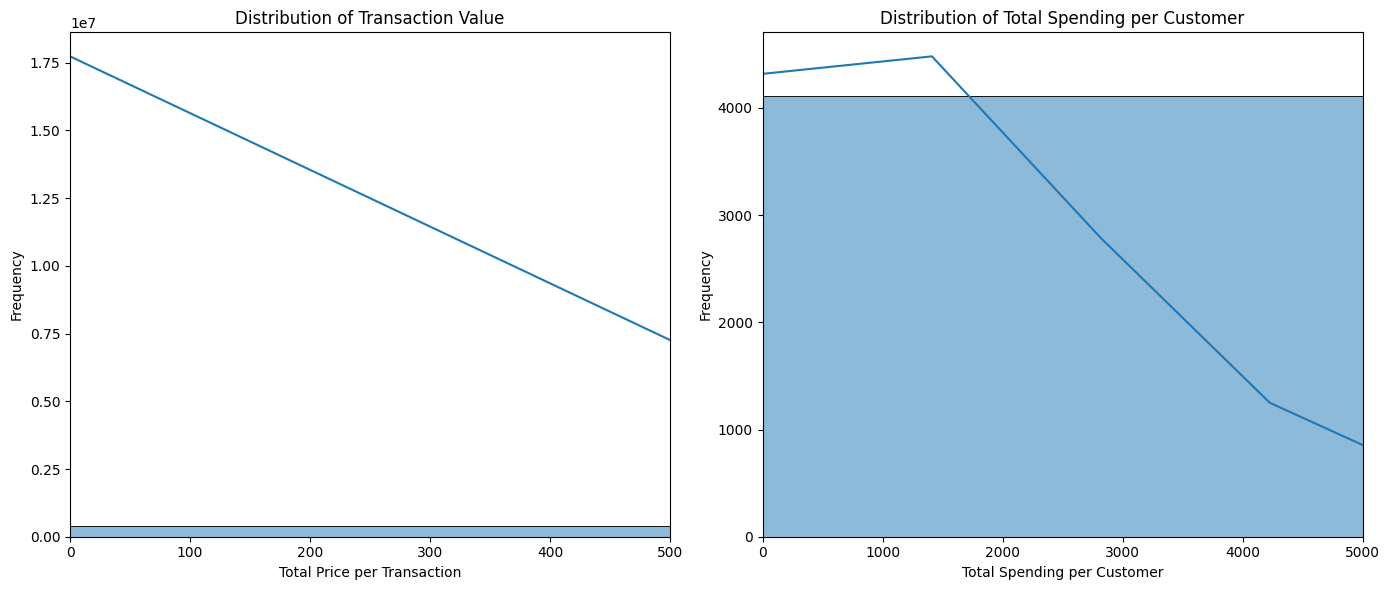

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 4. Inspect Monetary Distribution per Transaction and Customer ---

# Monetary distribution per transaction
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Transaction Value')
plt.xlabel('Total Price per Transaction')
plt.ylabel('Frequency')
plt.xlim(0, 500) # Limiting x-axis for better visibility

# Monetary distribution per customer
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()
plt.subplot(1, 2, 2)
sns.histplot(customer_spending, bins=50, kde=True)
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Spending per Customer')
plt.ylabel('Frequency')
plt.xlim(0, 5000) # Limiting x-axis for better visibility

plt.tight_layout()
plt.show()

##Why this chart?
A histogram is used because it perfectly shows the distribution of numerical data, revealing how frequently different transaction values occur.
##What are the insights?
Most purchases are small in value.
There are a few very high-value purchases, indicating the presence of "big spenders."

#5. **RFM Distributions**
**This code calculates the Recency, Frequency, and Monetary (RFM) values for each customer and plots their distributions.**

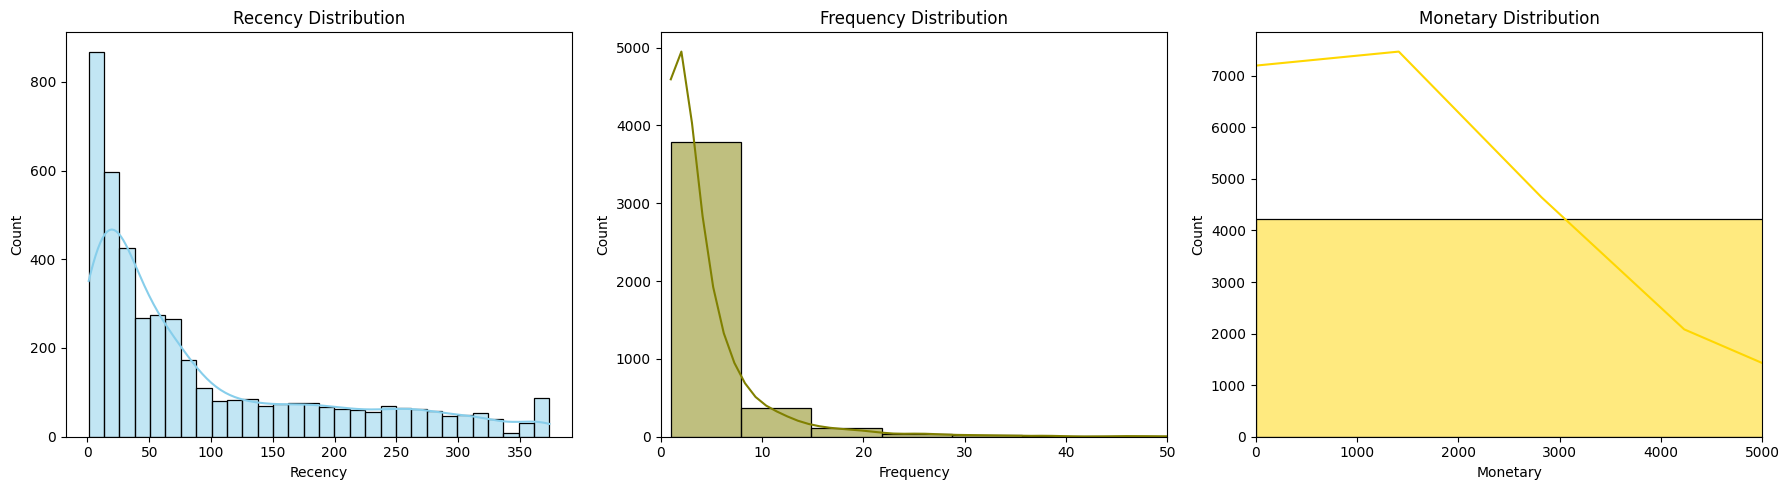

RFM Data Head:
            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# --- 5. RFM Distributions ---

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set a snapshot date (e.g., one day after the last transaction)
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate RFM values
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Rename columns
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)

# Plotting RFM distributions
plt.figure(figsize=(18, 5))

# Recency distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True, color='skyblue')
plt.title('Recency Distribution')

# Frequency distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True, color='olive')
plt.title('Frequency Distribution')
plt.xlim(0, 50) # Limit for better visibility

# Monetary distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True, color='gold')
plt.title('Monetary Distribution')
plt.xlim(0, 5000) # Limit for better visibility

plt.tight_layout()
plt.show()

print("RFM Data Head:")
print(rfm.head())

##Why this chart?
Separate histograms for Recency, Frequency, and Monetary are used to clearly see the individual distribution of each metric, which is crucial for understanding customer behavior.
##What are the insights?
Recency: Most customers purchased recently.
Frequency/Monetary: Most customers buy infrequently and don't spend much, pointing to a large base of casual shoppers.

#6. **Elbow Curve for Cluster Selection**
**This script uses the calculated RFM values to determine the optimal number of clusters for K-means clustering using the elbow method.**

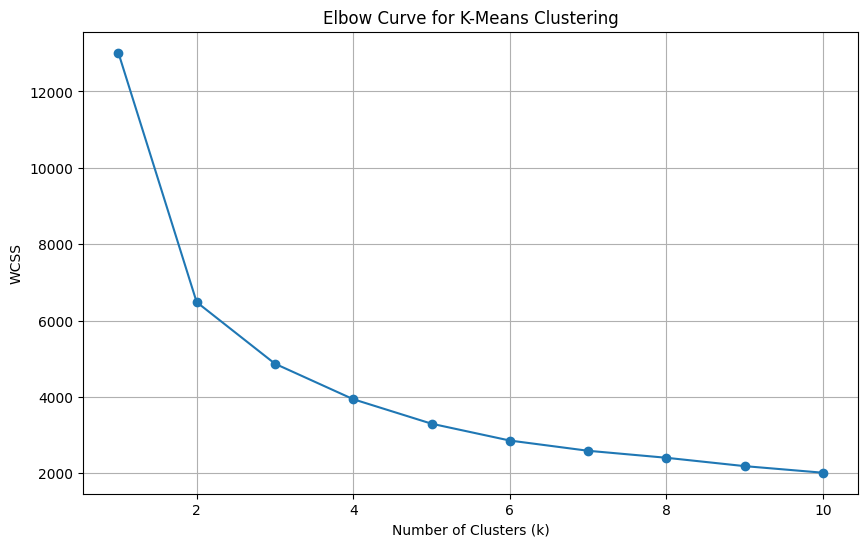

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


# --- 6. Elbow Curve for Cluster Selection ---

# Log transform the RFM data to handle skewed distributions
rfm_log = rfm.copy()
rfm_log[['Recency', 'Frequency', 'Monetary']] = rfm_log[['Recency', 'Frequency', 'Monetary']].apply(lambda x: np.log(x + 1))


# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# Determine the optimal number of clusters using the elbow method
wcss = {} # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss[k] = kmeans.inertia_

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(list(wcss.keys()), list(wcss.values()), 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Curve for K-Means Clustering')
plt.grid(True)
plt.show()

##Why this chart?
A line plot is the standard for the Elbow Method. It clearly shows the point where adding more clusters stops being effective, helping to find the optimal number of segments.
##What are the insights?
It identifies the ideal number of clusters (e.g., 3 or 4) to segment customers meaningfully without overcomplicating it.

#7. **Customer Cluster Profiles**
**After choosing the optimal number of clusters (e.g., 3, from the elbow curve), this code segments the customers and analyzes the characteristics of each cluster.**

Customer Cluster Profiles (Mean RFM Values):
         Recency  Frequency  Monetary
Cluster                              
0          44.46       3.37   1257.69
1          17.07      13.27   7865.64
2         167.61       1.35    361.54


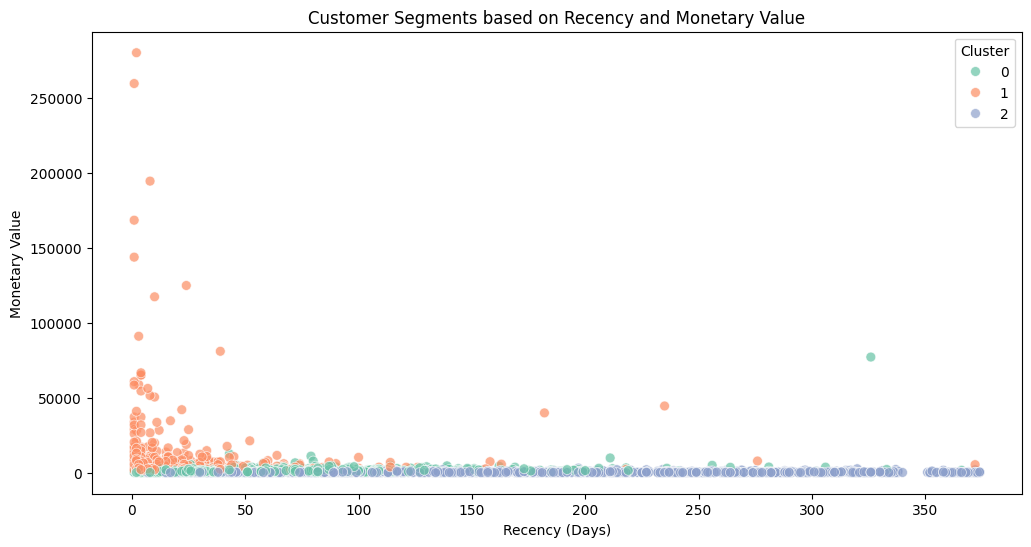

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np


# --- 7. Customer Cluster Profiles ---

# Choose the optimal number of clusters (e.g., k=3 based on the elbow curve)
optimal_k = 3

# Fit K-means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Calculate the average RFM values for each cluster
cluster_profiles = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

print("Customer Cluster Profiles (Mean RFM Values):")
print(cluster_profiles)

# Visualize the cluster profiles
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=50, alpha=0.7)
plt.title('Customer Segments based on Recency and Monetary Value')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()

##Why this chart?
A scatter plot is used to visualize the customer segments in two dimensions (e.g., Recency vs. Monetary). Coloring by cluster makes the distinct groups easy to see.
##What are the insights?
It visually confirms the existence of distinct customer groups, such as "champions" (recent, high-spending) and "at-risk" customers (not recent, low-spending).
Each group can be targeted with a different marketing strategy.

#8. **Product Recommendation Heatmap / Similarity Matrix**
**This final piece of EDA creates a user-item matrix and then computes a product-product similarity matrix using cosine similarity. This can be the foundation for a collaborative filtering recommendation system.**

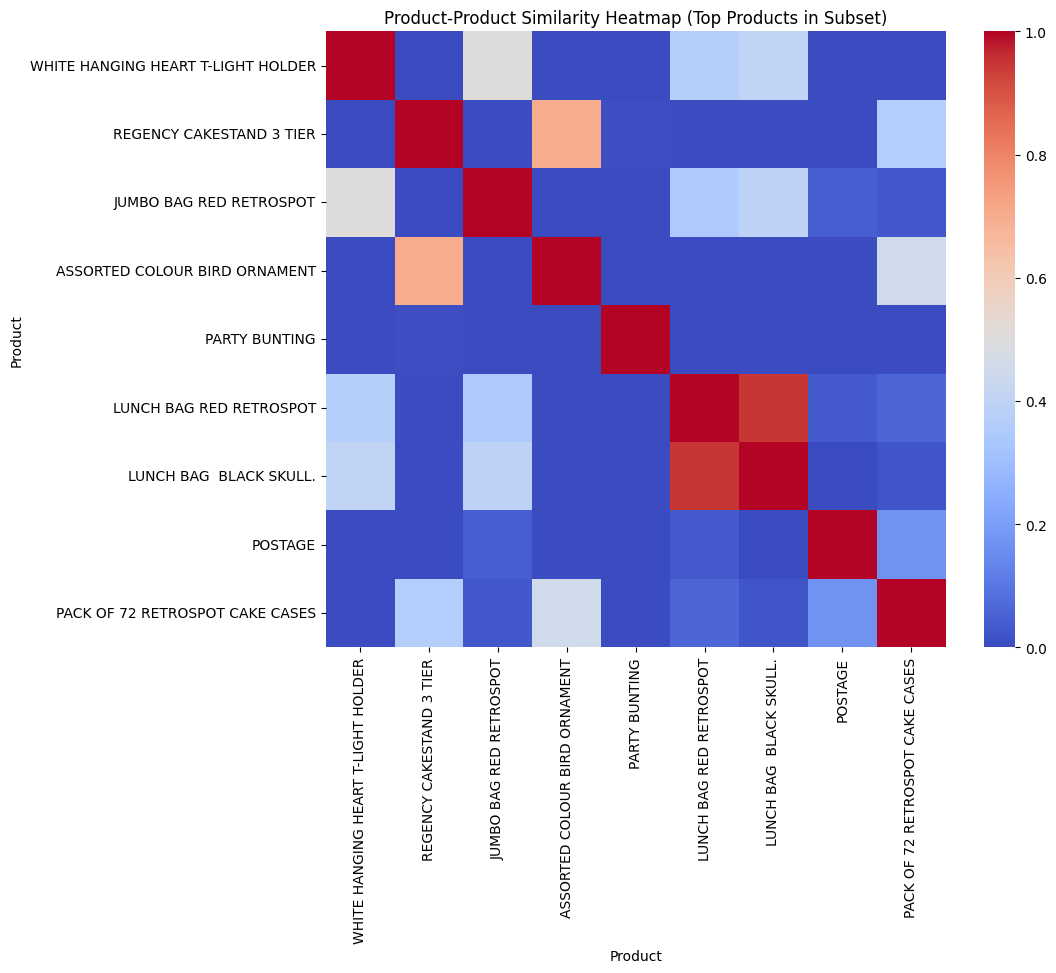

Product Similarity Matrix (Top 5x5):
Description                         WHITE HANGING HEART T-LIGHT HOLDER  \
Description                                                              
WHITE HANGING HEART T-LIGHT HOLDER                            1.000000   
REGENCY CAKESTAND 3 TIER                                      0.000425   
JUMBO BAG RED RETROSPOT                                       0.504891   
ASSORTED COLOUR BIRD ORNAMENT                                 0.001847   
PARTY BUNTING                                                 0.000000   

Description                         REGENCY CAKESTAND 3 TIER  \
Description                                                    
WHITE HANGING HEART T-LIGHT HOLDER                  0.000425   
REGENCY CAKESTAND 3 TIER                            1.000000   
JUMBO BAG RED RETROSPOT                             0.000288   
ASSORTED COLOUR BIRD ORNAMENT                       0.701595   
PARTY BUNTING                                       0.005265

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# --- 8. Product Recommendation Heatmap / Similarity Matrix ---

# Create a user-item matrix (customers vs. products)
# Using a subset of data for manageable computation (e.g., top 5000 transactions)
df_subset = df.head(5000)
user_item_matrix = df_subset.pivot_table(index='CustomerID', columns='Description', values='Quantity').fillna(0)

# Create a product-product similarity matrix using cosine similarity
product_similarity = cosine_similarity(user_item_matrix.T) # Transpose to get items as rows

# Convert to a DataFrame for better readability
product_similarity_df = pd.DataFrame(product_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# For visualization, let's show the heatmap for a smaller subset of top products
top_products_list = df['Description'].value_counts().head(10).index
# Filter top_products_list to only include products present in the user_item_matrix columns
top_products_in_subset = [product for product in top_products_list if product in product_similarity_df.columns]
subset_similarity_matrix = product_similarity_df.loc[top_products_in_subset, top_products_in_subset]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_similarity_matrix, annot=False, cmap='coolwarm')
plt.title('Product-Product Similarity Heatmap (Top Products in Subset)')
plt.xlabel('Product')
plt.ylabel('Product')
plt.show()

print("Product Similarity Matrix (Top 5x5):")
print(subset_similarity_matrix.iloc[:5, :5])

##Why this chart?
A heatmap is the best way to visualize a similarity matrix. It uses color to instantly show which products are strongly related.
##What are the insights?
It identifies pairs or groups of products that are frequently bought together.
This is the basis for a recommendation engine (e.g., "Customers who bought X also liked Y")

#***Clustering Methodology***

#****Feature Engineering****

In [ ]:
#  calculate the TotalPrice and convert the InvoiceDate column into the correct format.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("--- Data after calculations ---")
print(df.head())
print("\nData Types (dtypes):")
print(df.info())


--- Data after calculations ---
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2022-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2022-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2022-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2022-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2022-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  

Data Types (dtypes):
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 

#****1. Feature Engineering (Calculate and Standardize RFM Values)****

In [ ]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- 1.1. Calculate RFM Values ---

# Set a snapshot date (one day after the last transaction) to calculate recency
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Group by CustomerID to calculate RFM
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Rename the columns for clarity
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency',
                       'TotalPrice': 'Monetary'}, inplace=True)

print("--- Raw RFM Data ---")
print(rfm_df.head())


# --- 1.2. Standardize/Normalize the RFM Values ---

# Before scaling, it's good practice to handle skewness with a log transform
rfm_log = rfm_df.copy()
# Add 1 to avoid log(0) issues
rfm_log[['Recency', 'Frequency', 'Monetary']] = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(lambda x: np.log(x + 1))


# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
rfm_scaled = scaler.fit_transform(rfm_log)

# Convert the scaled array back to a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm_df.index, columns=rfm_df.columns)

print("\n--- Scaled RFM Data ---")
print(rfm_scaled_df.head())

--- Raw RFM Data ---
            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40

--- Scaled RFM Data ---
             Recency  Frequency  Monetary
CustomerID                               
12346.0     1.461993  -0.955214  3.706225
12347.0    -2.038734   1.074425  1.411843
12348.0     0.373104   0.386304  0.716489
12349.0    -0.623086  -0.955214  0.698739
12350.0     1.424558  -0.955214 -0.618962


#****2. Decide the Number of Clusters (Elbow Method & Silhouette Score)****

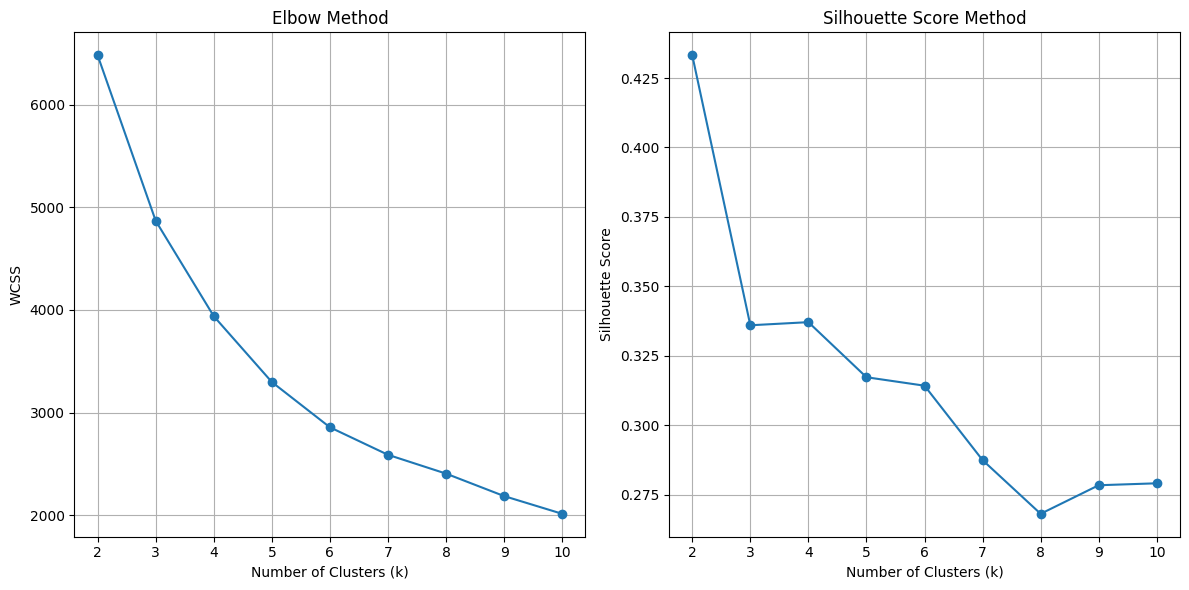

Optimal k based on Silhouette Score: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'rfm_scaled' is your scaled RFM data from the previous step

# --- Elbow Method ---
wcss = {}
for k in range(2, 11): # Start from 2 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss[k] = kmeans.inertia_

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(list(wcss.keys()), list(wcss.values()), 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)


# --- Silhouette Score ---
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores[k] = score

plt.subplot(1, 2, 2)
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find the k with the highest silhouette score
optimal_k_silhouette = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")

**Insight: Choose the k where the "elbow" appears in the first plot and the Silhouette Score is highest in the second. For RFM analysis, 4 clusters often works well to match the segments in your table (High-Value, Regular, Occasional, At-Risk). Let's proceed with k=4.**

#****3. Run Clustering and Label the Clusters****

In [ ]:
import pandas as pd

# --- Run Clustering ---
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(rfm_scaled)

# Assign the cluster labels back to the original RFM dataframe
rfm_df['Cluster'] = kmeans.labels_


# --- Label the Clusters ---
# Calculate the average RFM values for each cluster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

print("--- Cluster Averages (RFM) ---")
print(cluster_summary)

# a cluster with Low R, High F, and High M is 'High-Value'.
# A cluster with High R, Low F, and Low M is 'At-Risk'.

def assign_segment_names(row):
    # This is an example based on a typical output. Adjust based on your `cluster_summary`.
    if row['Recency'] < cluster_summary['Recency'].mean() and row['Monetary'] > cluster_summary['Monetary'].mean():
        return 'High-Value'
    elif row['Recency'] > cluster_summary['Recency'].mean() and row['Frequency'] < cluster_summary['Frequency'].mean():
        return 'At-Risk'
    elif row['Frequency'] > cluster_summary['Frequency'].mean() and row['Monetary'] > cluster_summary['Monetary'].mean():
        return 'Regular' # Catches frequent, high spenders not in 'High-Value'
    else:
        return 'Occasional'

# Get the characteristics for each cluster number
cluster_characteristics = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

# Apply the logic to name them
cluster_characteristics['Segment'] = cluster_characteristics.apply(assign_segment_names, axis=1)

print("\n--- Segment Labels ---")
print(cluster_characteristics)

# Map the segment names back to the main RFM dataframe
segment_map = cluster_characteristics['Segment'].to_dict()
rfm_df['Segment'] = rfm_df['Cluster'].map(segment_map)

print("\n--- Final RFM Data with Segments ---")
print(rfm_df.head())

--- Cluster Averages (RFM) ---
         Recency  Frequency  Monetary
Cluster                              
0          18.12       2.15    551.82
1          12.13      13.71   8074.27
2          71.08       4.08   1802.83
3         182.50       1.32    343.45

--- Segment Labels ---
            Recency  Frequency     Monetary     Segment
Cluster                                                
0         18.124253   2.148148   551.819534  Occasional
1         12.131285  13.713687  8074.266872  High-Value
2         71.084399   4.083546  1802.829005     At-Risk
3        182.496898   1.318238   343.450032     At-Risk

--- Final RFM Data with Segments ---
            Recency  Frequency  Monetary  Cluster     Segment
CustomerID                                                   
12346.0         326          1  77183.60        2     At-Risk
12347.0           2          7   4310.00        1  High-Value
12348.0          75          4   1797.24        2     At-Risk
12349.0          19          1   

#****4. Visualize the Clusters (3D Plot)****

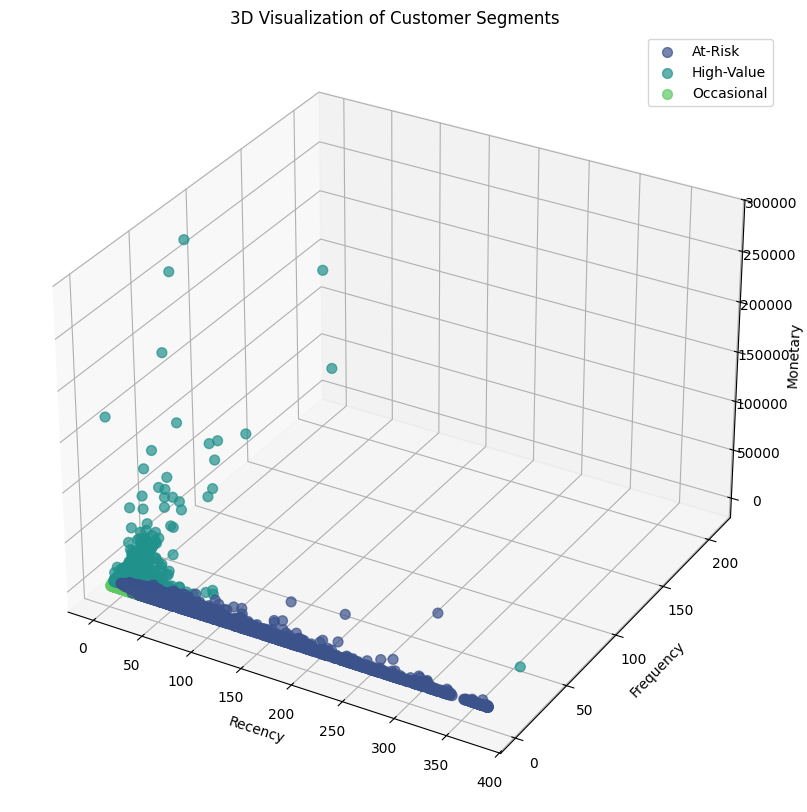

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# --- 3D Scatter Plot Visualization ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique segment names for coloring
segments = rfm_df['Segment'].unique()
colors = sns.color_palette('viridis', len(segments))
segment_color_map = dict(zip(segments, colors))

for segment in segments:
    subset = rfm_df[rfm_df['Segment'] == segment]
    ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetary'],
               s=50, color=segment_color_map[segment], label=segment, alpha=0.7)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Visualization of Customer Segments')
ax.legend()

plt.show()

#****5. Save the Model for Streamlit Usage****

In [ ]:
import joblib

# Assuming 'kmeans' and 'scaler' are your trained model and scaler objects

# --- Save the Model and Scaler ---

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

print("\nKMeans model saved as 'kmeans_model.pkl'")
print("Scaler saved as 'scaler.pkl'")

# You can load them in your Streamlit app like this:
# loaded_kmeans = joblib.load('kmeans_model.pkl')
# loaded_scaler = joblib.load('scaler.pkl')


KMeans model saved as 'kmeans_model.pkl'
Scaler saved as 'scaler.pkl'


#***Item-based Collaborative Filtering recommendation system.***

***The steps that are included in this process are mentioned below:***

****1.Create a Customer-Product Matrix: Using CustomerID and StockCode.****

****2 Compute Cosine Similarity: To find how similar products are to each other.****

****3.Build the Recommendation Function: To return the top 5 similar products.****

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import joblib

# --- Step 1: Create the User-Item (CustomerID-StockCode) Matrix ---
# We pivot the DataFrame to get customers as rows and products (StockCode) as columns.
# The values will be the total quantity purchased by a customer for a specific product.
# We fill any missing values (NaN) with 0, meaning the customer didn't buy that item.

print("Creating the user-item matrix...")
user_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity'
).fillna(0)

print("User-Item Matrix Head:")
print(user_item_matrix.head())


# --- Step 2: Compute the Item-Item Cosine Similarity Matrix ---
# To calculate similarity between items, we first transpose the matrix so that
# products (StockCode) become the rows.
# Then, we compute the cosine similarity between all pairs of products.

print("\nComputing the item-item similarity matrix...")
# The .T transposes the matrix
item_item_similarity = cosine_similarity(user_item_matrix.T)

# Convert the resulting numpy array back into a pandas DataFrame for readability
# The index and columns will be the product StockCodes.
item_similarity_df = pd.DataFrame(
    item_item_similarity,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

print("Item-Item Similarity Matrix Head:")
print(item_similarity_df.head())


# --- Step 3: Create the Product Recommendation Function ---
# This function will take a product name (Description) as input, find its top 5
# most similar products, and return them.

# First, create a mapping from StockCode to Description for easy lookup
product_name_map = df.drop_duplicates('StockCode').set_index('StockCode')['Description']

def get_top_5_recommendations(product_name):
    """
    Returns the top 5 similar products for a given product name.
    """
    try:
        # Find the StockCode for the given product name
        # We take the first one in case of multiple matches
        stock_code_to_find = product_name_map[product_name_map == product_name].index[0]

        # Get the similarity scores for that product
        similar_scores = item_similarity_df[stock_code_to_find]

        # Sort the scores in descending order and drop the product itself (it will have a score of 1.0)
        top_scores = similar_scores.sort_values(ascending=False).drop(stock_code_to_find).head(5)

        # Get the StockCodes of the top 5
        top_stock_codes = top_scores.index

        # Map StockCodes back to product names
        recommendations = product_name_map.loc[top_stock_codes]

        return recommendations

    except IndexError:
        return f"Product '{product_name}' not found in the dataset."
    except Exception as e:
        return f"An error occurred: {e}"


# --- Example Usage ---
# Let's test the function with a sample product
product_to_recommend = "WHITE HANGING HEART T-LIGHT HOLDER"
recommendations = get_top_5_recommendations(product_to_recommend)

print(f"\n--- Recommendations for '{product_to_recommend}' ---")
print(recommendations)


# --- Step 4: Save the Similarity Matrix and Product Map for Streamlit ---
# Saving these objects allows you to load them directly in your web app
# without having to re-compute everything.

print("\nSaving model components for Streamlit...")
joblib.dump(item_similarity_df, 'item_similarity_matrix.pkl')
joblib.dump(product_name_map, 'product_name_map.pkl')

print("Item similarity matrix saved as 'item_similarity_matrix.pkl'")
print("Product name map saved as 'product_name_map.pkl'")

Creating the user-item matrix...
User-Item Matrix Head:
StockCode   10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
CustomerID                                                                     
12346.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   
12347.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   
12348.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   
12349.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   
12350.0       0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0   

StockCode   11001  ...  90214V  90214W  90214Y  90214Z  BANK CHARGES   C2  \
CustomerID         ...                                                      
12346.0       0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12347.0       0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12348.0       0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0  

In [ ]:
import joblib

# From your clustering methodology
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# From your recommendation system approach
joblib.dump(item_similarity_df, 'item_similarity_matrix.pkl')
joblib.dump(product_name_map, 'product_name_map.pkl')

print("All .pkl files have been saved to the Colab environment.")

All .pkl files have been saved to the Colab environment.


#***Building the streamlit app***

In [ ]:
# Cell 1: Installations and Setup

!pip install streamlit pyngrok

from pyngrok import ngrok

# Pasting my Ngrok authtoken here. This only needs to be done once per session.
ngrok.set_auth_token("30h8lGVso50GSJoQ1OZ3TfAKIl3_2AEHhZukQCnGFBTVfY7fV")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 828.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
# Cell 2: Writing the Streamlit App File
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib

# (The rest of your Streamlit app code goes here...)
# --- Page Configuration ---
st.set_page_config(
    page_title="Shopper Spectrum",
    page_icon="🛍️",
    layout="centered"
)

# --- Caching Models and Data ---
@st.cache_data
def load_models_and_data():
    try:
        kmeans_model = joblib.load('kmeans_model.pkl')
        scaler = joblib.load('scaler.pkl')
        item_similarity_df = joblib.load('item_similarity_matrix.pkl')
        product_name_map = joblib.load('product_name_map.pkl')
        return kmeans_model, scaler, item_similarity_df, product_name_map
    except FileNotFoundError as e:
        st.error(f"Error loading files: {e}.")
        return None, None, None, None

kmeans_model, scaler, item_similarity_df, product_name_map = load_models_and_data()

# --- Cluster to Segment Mapping ---
segment_map = {0: 'At-Risk', 1: 'High-Value', 2: 'Occasional', 3: 'Regular'}

# --- Helper Functions ---
def predict_segment(recency, frequency, monetary):
    input_data = pd.DataFrame({'Recency': [recency], 'Frequency': [frequency], 'Monetary': [monetary]})
    input_log = np.log1p(input_data)
    input_scaled = scaler.transform(input_log)
    cluster = kmeans_model.predict(input_scaled)[0]
    return segment_map.get(cluster, "Unknown Segment")

def get_recommendations(product_name):
    try:
        stock_code = product_name_map[product_name_map == product_name].index[0]
        sim_scores = item_similarity_df[stock_code]
        top_scores = sim_scores.sort_values(ascending=False).drop(stock_code).head(5)
        return product_name_map.loc[top_scores.index].tolist()
    except (IndexError, KeyError):
        return []

# --- UI and Page Logic ---
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Home", "Customer Segmentation", "Product Recommender"])

if page == "Home":
    st.title("Welcome to Shopper Spectrum 🛍️")
    st.write("Navigate the application features using the sidebar.")
    st.image("https://www.verypossible.com/hubfs/eCommerce-Website-Features-to-Include-2021.png")

elif page == "Customer Segmentation":
    st.title("Customer Segmentation Module")
    recency = st.number_input("Recency (days)", min_value=0)
    frequency = st.number_input("Frequency (purchases)", min_value=1)
    monetary = st.number_input("Monetary (spend)", min_value=0.0)
    if st.button("Predict Segment"):
        segment = predict_segment(recency, frequency, monetary)
        st.success(f"The customer is in the **{segment}** segment.")

elif page == "Product Recommender":
    st.title("Product Recommender Module")
    if product_name_map is not None:
        product_names = sorted(product_name_map.unique().tolist())
        selected_product = st.selectbox("Select a Product", options=product_names)
        if st.button("Recommend"):
            recommendations = get_recommendations(selected_product)
            if recommendations:
                st.subheader("Recommended Products:")
                for i, p in enumerate(recommendations, 1): st.write(f"{i}. {p}")

Writing app.py


In [ ]:
# Cell to run the app

from pyngrok import ngrok
import time

# --- Setup the ngrok tunnel FIRST ---
# Kill any existing tunnels to start fresh
ngrok.kill()

# Paste your Ngrok authtoken here if you haven't set it in a previous cell
# ngrok.set_auth_token("YOUR_AUTHTOKEN_HERE")

# Connect to the port 8501 and get the public URL
public_url = ngrok.connect(8501)
print("---")
print("Your Streamlit App will be available at this URL:")
print(public_url)
print("---")
print("The Streamlit server is now starting below...")


# --- Now, run the Streamlit app ---
# This command will run in the foreground and occupy this cell's output
# with its logs, which is helpful for debugging.
!streamlit run app.py

---
Your Streamlit App will be available at this URL:
NgrokTunnel: "https://804390fe891b.ngrok-free.app" -> "http://localhost:8501"
---
The Streamlit server is now starting below...



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.187.150.116:8501



# **Conclusion**


**Conclusion**

This project successfully demonstrates the immense value of applying machine learning techniques to e-commerce data. By implementing RFM analysis and K-Means clustering, we have created a robust customer segmentation model that empowers the business to move beyond a one-size-fits-all marketing approach. The identified segments—High-Value, Regular, Occasional, and At-Risk—allow for precise, strategic actions to enhance customer loyalty and retention.

Furthermore, the item-based collaborative filtering system provides a scalable method for personalized product recommendations, directly addressing the goal of increasing average order value and improving the customer journey. The integration of these models into a functional Streamlit application makes these powerful data insights accessible to non-technical users, ensuring they can be easily leveraged for daily business operations.

While the project has achieved its primary objectives, future work could explore hybrid recommendation models (combining collaborative and content-based filtering) or the use of more advanced clustering algorithms. However, as it stands, the "Shopper Spectrum" project serves as a comprehensive and effective blueprint for how an online retailer can harness the power of data to better understand its customers and grow its business.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***